In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from textblob import TextBlob

# Загрузка данных из CSV-файла
telegram_messages = pd.read_csv('data/telegram_messages.csv')

# Преобразование столбца 'date' в формат datetime
telegram_messages['date'] = pd.to_datetime(telegram_messages['date'])
telegram_messages

,date,sender_id,message,char_count,word_count,has_photo,has_video,has_audio,has_document
0,2024-06-08 11:22:26,1.438208e+09,Минимум затрат времени на задачу = 40 часов,43,8,False,False,False,False
1,2024-06-08 11:20:38,1.438208e+09,Идеально - если у Вас есть платёжеспособный за...,178,27,False,False,False,False
2,2024-06-08 06:06:58,9.545769e+07,Идеально - если есть реальная задача и вы ее п...,62,11,False,False,False,False
3,2024-06-08 05:46:30,1.702404e+09,"Добрый день коллеги, кто нибудь подскажет с че...",133,19,False,False,False,False
4,2024-06-07 20:39:55,5.140743e+08,NaN,0,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...
53933,2018-05-25 18:59:52,3.515917e+08,NaN,0,0,True,False,False,False
53934,2018-05-25 18:59:52,3.515917e+08,"Прикиньте, даже на телефоне сервис работает",43,6,False,False,False,False
53935,2018-05-25 18:40:02,3.515917e+08,NaN,0,0,False,False,False,True
53936,2018-05-25 18:14:16,4.995597e+08,Хелло,5,1,False,False,False,False


Общее количество сообщений: 53938
Частота сообщений в месяц:
date
2018-05-21/2018-05-27      6
2018-05-28/2018-06-03    224
2018-06-04/2018-06-10     79
2018-06-11/2018-06-17     45
2018-06-18/2018-06-24     43
                        ... 
2024-05-06/2024-05-12     65
2024-05-13/2024-05-19     66
2024-05-20/2024-05-26    123
2024-05-27/2024-06-02    187
2024-06-03/2024-06-09    166
Freq: W-SUN, Name: count, Length: 316, dtype: int64


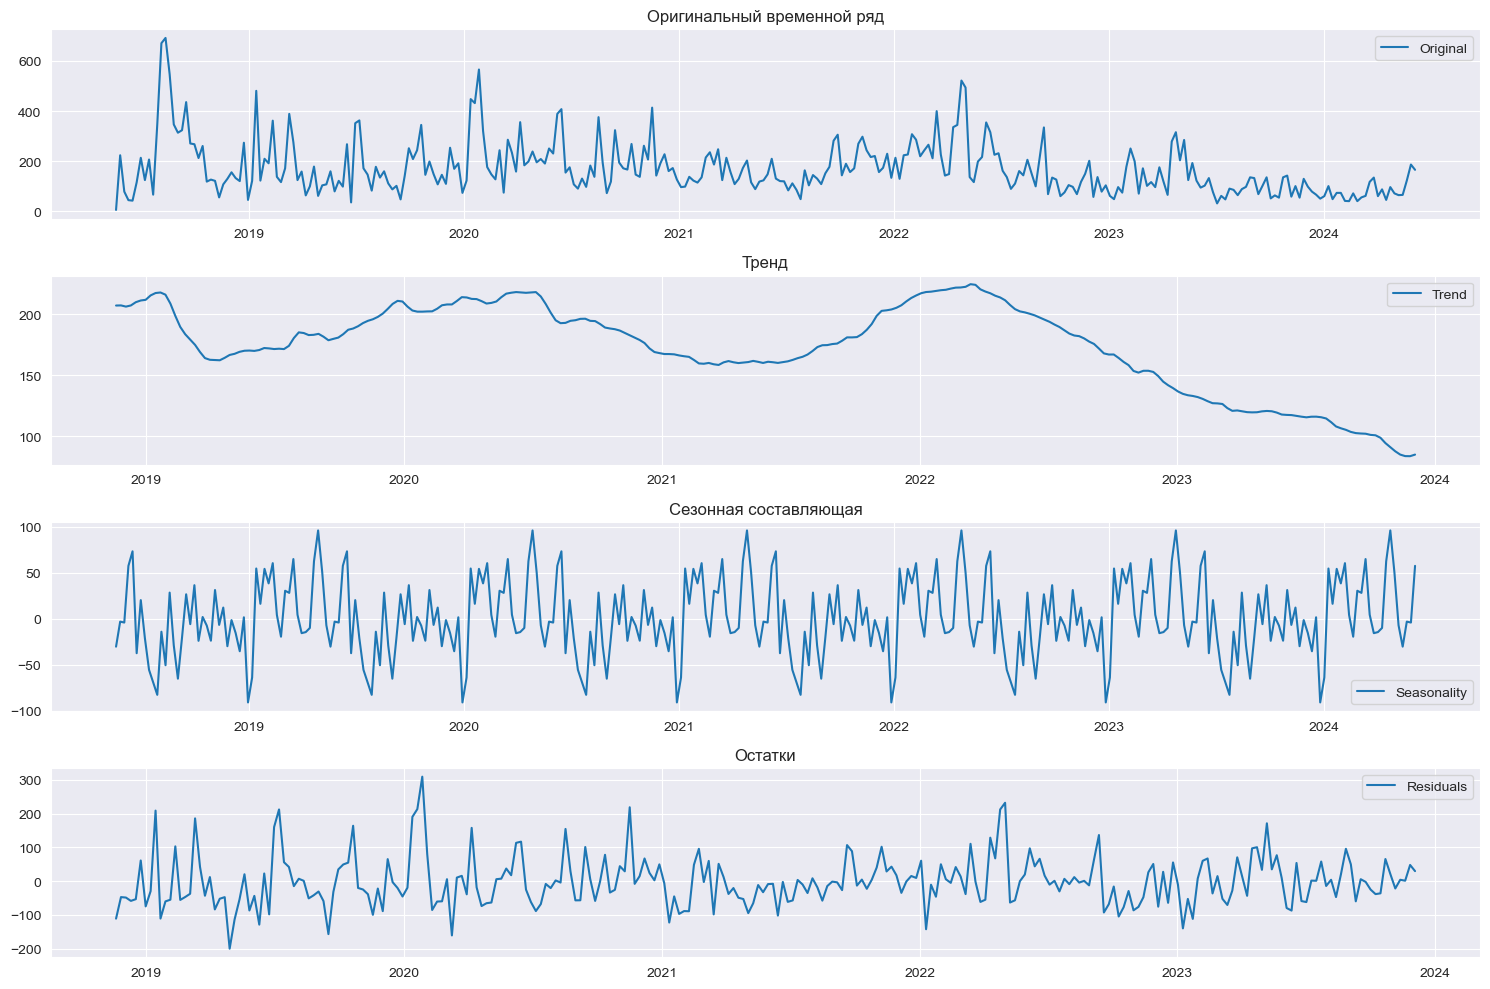

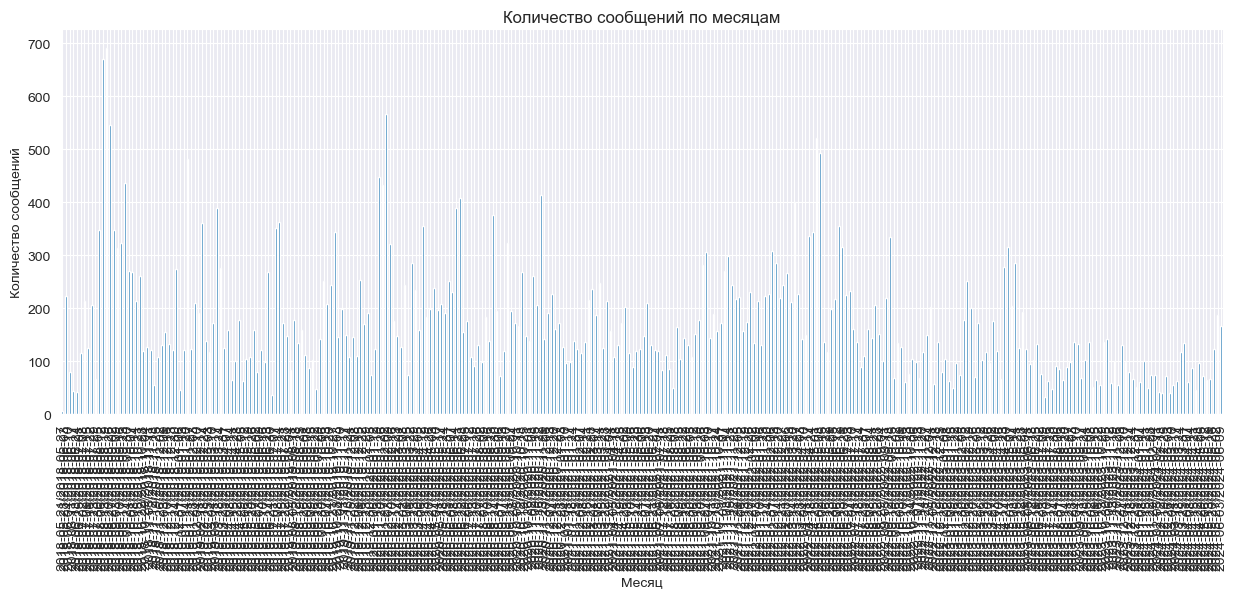

In [24]:
# # Добавление столбцов для анализа
# telegram_messages['char_count'] = telegram_messages['message'].apply(lambda x: len(str(x)))
# telegram_messages['word_count'] = telegram_messages['message'].apply(lambda x: len(str(x).split()))
from statsmodels.tsa.seasonal import seasonal_decompose

# Общее количество сообщений
total_messages = len(telegram_messages)
print(f"Общее количество сообщений: {total_messages}")

# Количество сообщений в месяц
messages_per_month = telegram_messages['date'].dt.to_period('W').value_counts().sort_index()
print(f"Частота сообщений в месяц:\n{messages_per_month}")

# Преобразование в DataFrame для декомпозиции
messages_per_month_df = messages_per_month.to_timestamp().to_frame(name='message_count')

# Декомпозиция временного ряда
decomposition = seasonal_decompose(messages_per_month_df['message_count'], model='additive')

# Визуализация декомпозиции
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(messages_per_month_df, label='Original')
plt.legend(loc='best')
plt.title('Оригинальный временной ряд')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Тренд')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Сезонная составляющая')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.title('Остатки')

plt.tight_layout()
plt.show()

# Распределение количества сообщений по месяцам
plt.figure(figsize=(15, 5))
messages_per_month.plot(kind='bar')
plt.title('Количество сообщений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество сообщений')
plt.show()




Активность пользователей:
sender_id
4.311422e+08    3804
5.486644e+08    3615
1.635236e+08    2667
1.905219e+08    2159
3.492782e+08    1697
                ... 
6.702021e+08       1
2.090172e+09       1
1.191936e+09       1
9.873622e+08       1
5.213561e+09       1
Name: count, Length: 5028, dtype: int64
Типы сообщений:
{'text': 46939, 'photo': 3350, 'video': 81, 'audio': 16, 'document': 535}
Средняя длина сообщения: 81.65 символов
Среднее количество слов в сообщении: 12.09
Количество вопросов: 12113
Количество ответов: 41825
Среднее время ответа: 3533.20 секунд
Часто упоминаемые слова: [('не', 13318), ('то', 6482), ('я', 5222), ('если', 5141), ('можно', 4131), ('есть', 3885), ('так', 3413), ('aimylogic', 3168), ('все', 3032), ('или', 2988)]
Соотношение вопросов и ответов: 0.29
Сентимент анализа:
sentiment
neutral     52728
positive      840
negative      370
Name: count, dtype: int64


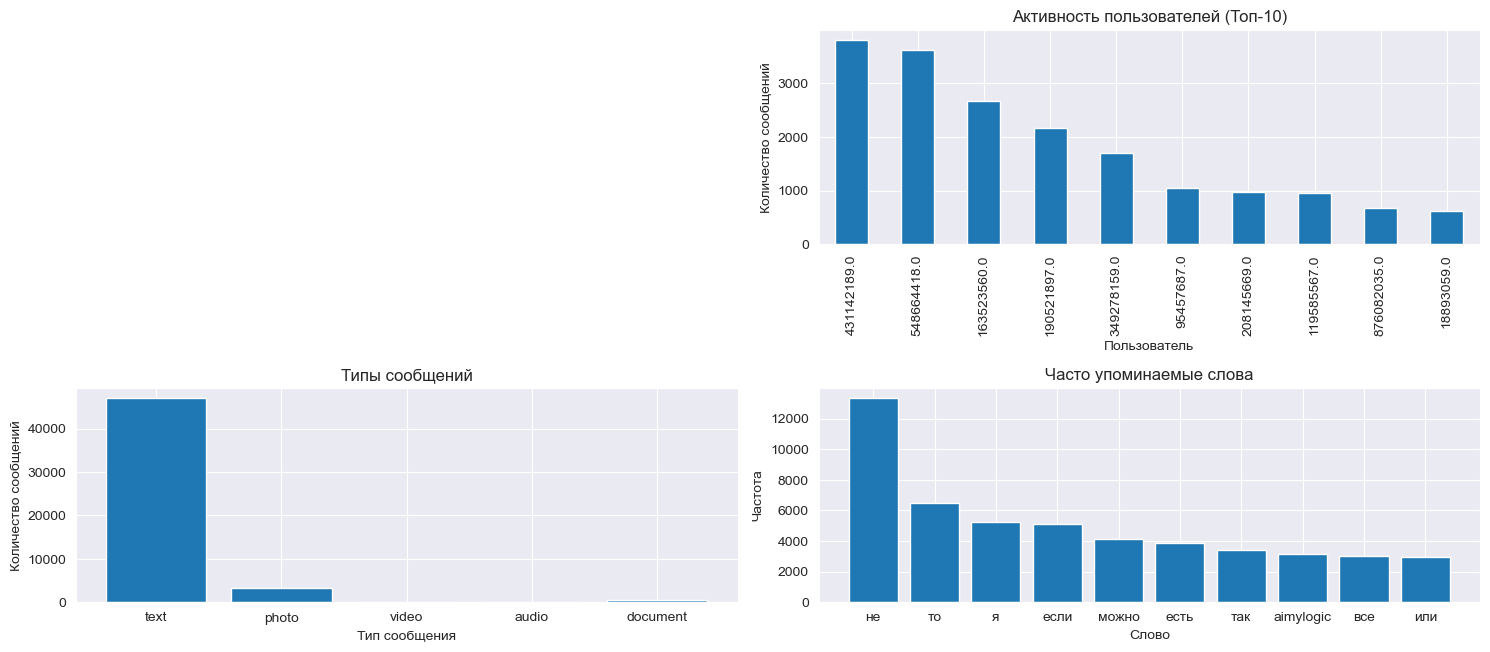

C:\Users\skobe\anaconda3\envs\Aimylogicc\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


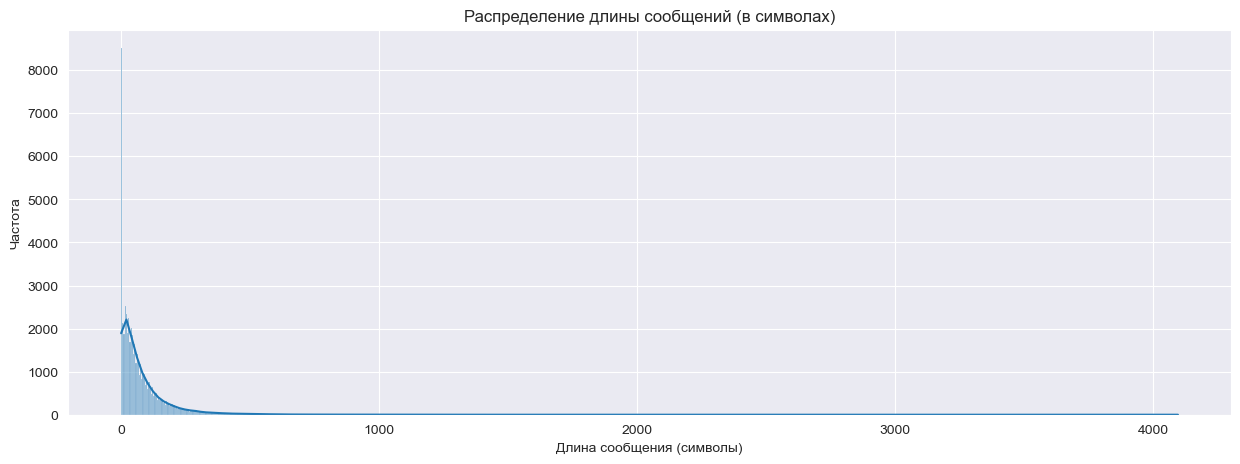

C:\Users\skobe\anaconda3\envs\Aimylogicc\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


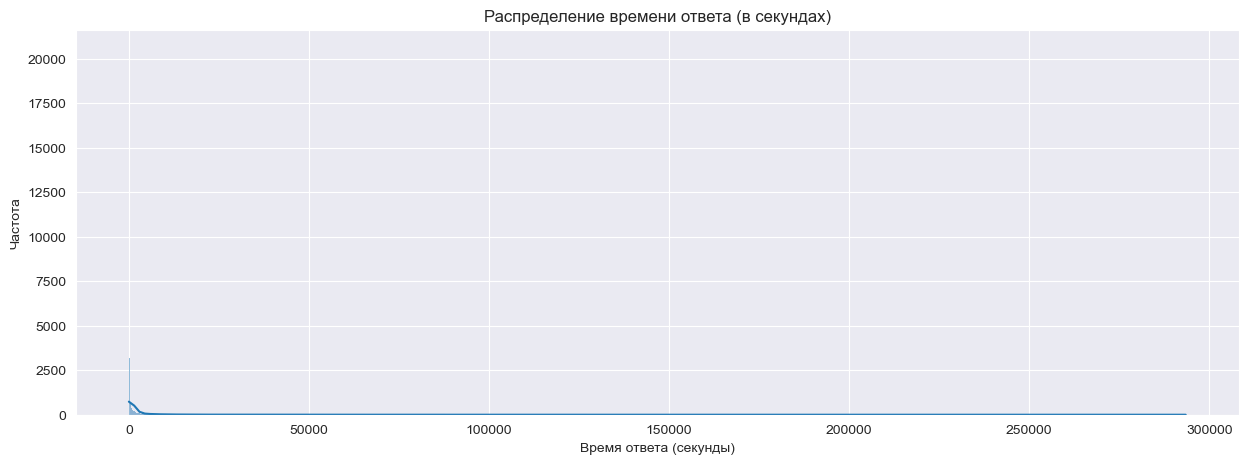

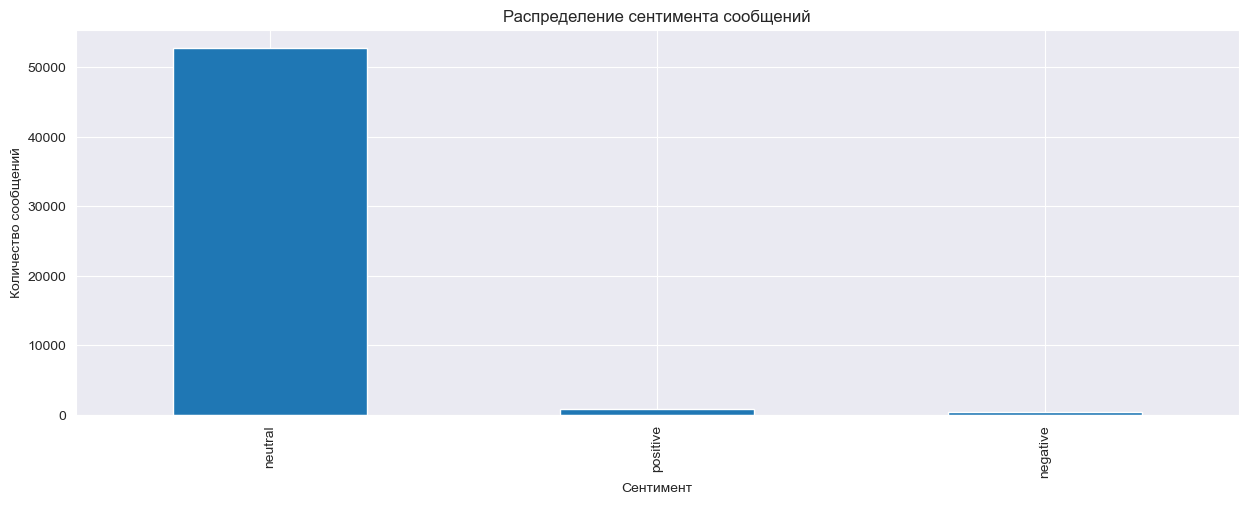

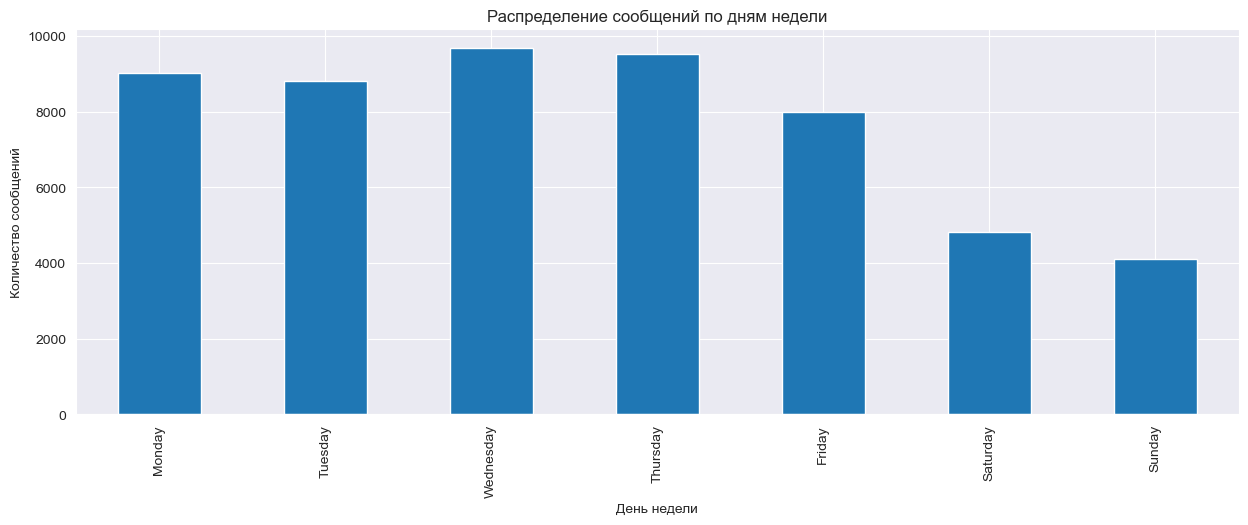

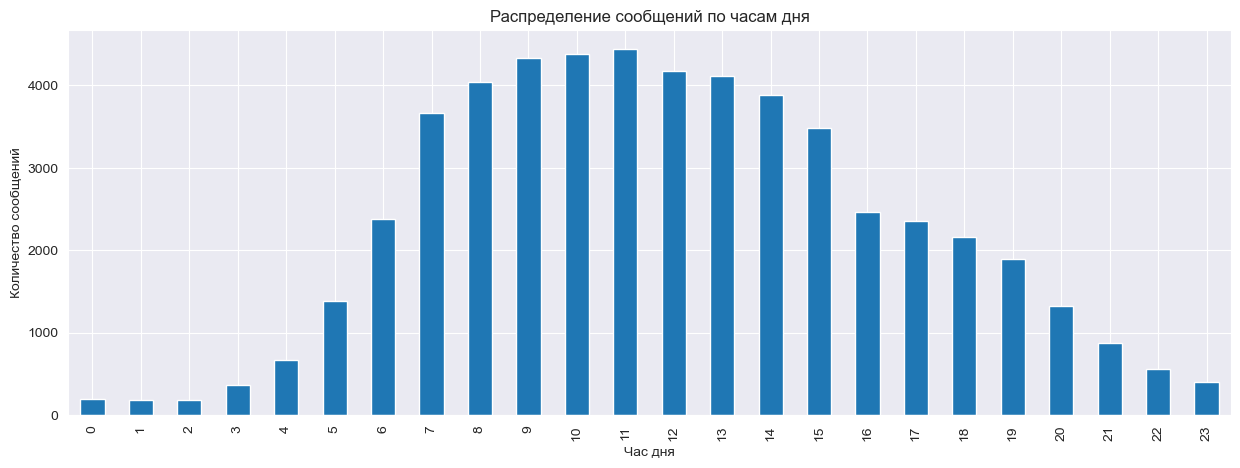

In [13]:

# # Количество сообщений в день
# messages_per_day = telegram_messages['date'].dt.date.value_counts().sort_index()
# print(f"Частота сообщений в день:\n{messages_per_day}")
# 
# # Количество сообщений в неделю
# messages_per_week = telegram_messages['date'].dt.to_period('W').value_counts().sort_index()
# print(f"Частота сообщений в неделю:\n{messages_per_week}")
# 
# # Количество сообщений в месяц
# messages_per_month = telegram_messages['date'].dt.to_period('M').value_counts().sort_index()
# print(f"Частота сообщений в месяц:\n{messages_per_month}")

# Активность пользователей
user_activity = telegram_messages['sender_id'].value_counts()
print(f"Активность пользователей:\n{user_activity}")

# Типы сообщений
message_types = {
    'text': telegram_messages['message'].notna().sum(),
    'photo': telegram_messages['has_photo'].sum(),
    'video': telegram_messages['has_video'].sum(),
    'audio': telegram_messages['has_audio'].sum(),
    'document': telegram_messages['has_document'].sum()
}
print(f"Типы сообщений:\n{message_types}")

# Длина сообщений
avg_char_count = telegram_messages['char_count'].mean()
avg_word_count = telegram_messages['word_count'].mean()
print(f"Средняя длина сообщения: {avg_char_count:.2f} символов")
print(f"Среднее количество слов в сообщении: {avg_word_count:.2f}")

# Ответы на вопросы
telegram_messages['is_question'] = telegram_messages['message'].apply(lambda x: '?' in str(x))
questions = telegram_messages[telegram_messages['is_question']]
answers = telegram_messages[~telegram_messages['is_question']]

num_questions = len(questions)
num_answers = len(answers)
print(f"Количество вопросов: {num_questions}")
print(f"Количество ответов: {num_answers}")

# Упрощенный анализ времени ответа
telegram_messages = telegram_messages.sort_values(by='date')
telegram_messages['response_time'] = telegram_messages['date'].diff().dt.total_seconds().fillna(0)
avg_response_time = telegram_messages['response_time'].mean()
print(f"Среднее время ответа: {avg_response_time:.2f} секунд")

# Часто упоминаемые слова (без стоп-слов)
stop_words = {'и', 'в', 'на', 'с', 'что', 'как', 'это', 'а', 'по', 'к', 'у', 'из', 'для', 'за', 'от', 'о', 'же', 'но', 'да', 'нет'}
words = re.findall(r'\b\w+\b', ' '.join(telegram_messages['message'].dropna()).lower())
words = [word for word in words if word not in stop_words]
common_words = Counter(words).most_common(10)
print(f"Часто упоминаемые слова: {common_words}")

# Соотношение вопросов и ответов
question_answer_ratio = num_questions / num_answers if num_answers > 0 else float('inf')
print(f"Соотношение вопросов и ответов: {question_answer_ratio:.2f}")

# Сентимент анализ
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

telegram_messages['sentiment'] = telegram_messages['message'].apply(lambda x: get_sentiment(str(x)) if pd.notna(x) else 'neutral')
sentiment_counts = telegram_messages['sentiment'].value_counts()
print(f"Сентимент анализа:\n{sentiment_counts}")

# Визуализация данных
plt.figure(figsize=(15, 10))


# Распределение активности пользователей
plt.subplot(3, 2, 1)
user_activity.head(10).plot(kind='bar')
plt.title('Активность пользователей (Топ-10)')
plt.xlabel('Пользователь')
plt.ylabel('Количество сообщений')

# Распределение типов сообщений
plt.subplot(3, 2, 2)
plt.bar(message_types.keys(), message_types.values())
plt.title('Типы сообщений')
plt.xlabel('Тип сообщения')
plt.ylabel('Количество сообщений')

# Часто упоминаемые слова
plt.subplot(3, 2, 3)
common_words_dict = dict(common_words)
plt.bar(common_words_dict.keys(), common_words_dict.values())
plt.title('Часто упоминаемые слова')
plt.xlabel('Слово')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Распределение длины сообщений
plt.figure(figsize=(15, 5))
sns.histplot(telegram_messages['char_count'], kde=True)
plt.title('Распределение длины сообщений (в символах)')
plt.xlabel('Длина сообщения (символы)')
plt.ylabel('Частота')
plt.show()

# Распределение времени ответа
plt.figure(figsize=(15, 5))
sns.histplot(telegram_messages['response_time'], kde=True)
plt.title('Распределение времени ответа (в секундах)')
plt.xlabel('Время ответа (секунды)')
plt.ylabel('Частота')
plt.show()

# Распределение сентимента сообщений
plt.figure(figsize=(15, 5))
sentiment_counts.plot(kind='bar')
plt.title('Распределение сентимента сообщений')
plt.xlabel('Сентимент')
plt.ylabel('Количество сообщений')
plt.show()

